In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Importing Libraries

In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Model

In [3]:
model = tf.keras.models.load_model("trained_model.keras")

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizing Single Image of Testset

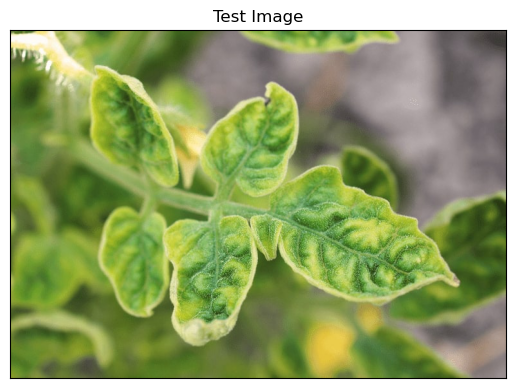

In [29]:
import cv2
image_path = "test/test/770x540_yellow_leaf_curl.jpg"
## Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [30]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Convert Single image to batch

In [31]:
prediction = model.predict(input_arr)
prediction

1/1 [==============================] - 0s 34ms/step


array([[1.2217855e-04, 1.0238706e-07, 3.2725220e-03, 3.1209722e-05,
        1.2879360e-06, 4.1596703e-02, 1.2265633e-05, 1.2321549e-01,
        1.5566775e-03, 6.6597229e-03, 4.6510186e-02, 1.8006356e-05,
        2.6958607e-05, 6.3983351e-04, 1.2884348e-06, 5.9792465e-03,
        1.7088077e-04, 1.4993471e-06, 7.1451628e-05, 1.0825814e-03,
        6.1180576e-06, 4.3445441e-05, 3.3627311e-04, 7.8046642e-04,
        5.3984331e-05, 2.4465960e-01, 5.1628046e-02, 9.0908368e-05,
        1.0750795e-03, 8.3706793e-05, 4.2156946e-02, 2.3572012e-04,
        2.6020521e-04, 2.4446617e-05, 1.3766180e-05, 4.2750356e-01,
        1.3100065e-05, 6.4614236e-05]], dtype=float32)

In [32]:
result_index = np.argmax(prediction)
result_index

35

In [33]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

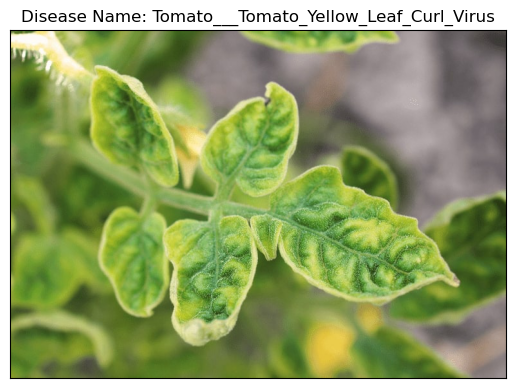

In [34]:
# Displaying Result for model Prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()